# Quantifying Market Sentiment and Its Impact on Stock Prices

## Introduction

This study was undertaken to explore the relationship between sentiments expressed on social media and news and their influence on stock prices. The primary research question driving this investigation was: To what extent do sentiments expressed on social media and news impact stock prices? The overarching goal was to provide valuable insights for investors and traders by understanding the dynamics between market sentiments and stock price movements.

## Motivation

The motivation behind this project stems from the increasing recognition of the influential role that sentiments expressed on social media and news platforms play in shaping stock market dynamics. As the financial landscape becomes more interconnected with digital communication channels, understanding the correlation between market sentiments and stock prices has emerged as a crucial factor for effective investment strategies. The surge in real-time information sharing on social platforms and the rapid dissemination of news necessitate a comprehensive exploration of how sentiments contribute to stock price movements. By delving into this relationship, the project aims to empower investors and traders with valuable insights, enhancing their decision-making processes in the dynamic realm of financial markets.ssary dependencies as specified in the project's requirements file located in the project folder.


## Methodology

The implemented Python script `pipeline.py` outlines a comprehensive data pipeline designed to collect, preprocess, and integrate data from diverse sources, enhancing the foundation for subsequent analyses.

1. **Kaggle Dataset Download:**
   - Utilizes the Kaggle API to download datasets related to stock exchange data and news articles.
   - Configures the Kaggle API with authentication details and sets the download directory.

2. **Dataset Preprocessing:**
   - Defines preprocessing functions specific to each dataset source.
   - Renames columns, handles datetime formats, and filters data to focus on the relevant time period (e.g., 2021).
   - Applies sentiment analysis to news articles to derive sentiment compound scores.

3. **SQLite Migration:**
   - Transfers the preprocessed data to an SQLite database.
   - Creates an SQLite engine and migrates data to appropriate tables with specified rules (replace or append).

4. **Overall Pipeline:**
   - Combines the above steps into a cohesive pipeline.
   - Calls functions sequentially to ensure a streamlined process from dataset download to SQLite migration.
   
In the Jupyter Notebook, data previously stored in SQLite is retrieved and utilized for in-depth analysis. Leveraging SQL queries and Python, this notebook explores relationships, patterns, and trends within the data, facilitating a comprehensive understanding of the underlying insights derived from the preprocessed and transformed datasets.

1. **SQLite Data Retrieval:**
   - Connects to the SQLite database and retrieves the preprocessed data.
   - Executes SQL queries or utilizes Pandas to fetch relevant datasets for analysis.

2. **Exploratory Data Analysis (EDA):**
   - Conducts exploratory data analysis to understand the characteristics of the datasets.
   - Creates visualizations and summary statistics to identify patterns and trends.

3. **Statistical Analysis and Modeling:**
   - Performs statistical analysis to quantify the impact of sentiments on stock price movements.
   - Applies modeling techniques to further explore correlations and relationships within the data.

4. **Real-World Trading Scenarios:**
   - Explores the practical applicability of the insights gained in real-world trading scenarios.
   - Considers the implications of sentiment analysis on decision-making for investors and traders.


## Data Sources and Explanation

### Stock Price Data

We sourced daily price data for global stock exchanges, including indexes from the United States, China, Canada, Germany, Japan, and more. This data was obtained from Kaggle, and it encompasses several decades of historical data from Yahoo Finance.

- **Metadata URL:** [Stock Exchange Data on Kaggle](https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data/data)
- **Data URL:** [Stock Exchange Data on Kaggle](https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data?select=indexData.csv)
- **Data Type:** CSV

### News Data

Two datasets from Kaggle were utilized for news sentiment analysis. The first dataset contains news headlines published over nineteen years by the Australian Broadcasting Corporation (ABC). The second dataset collects RSS feeds from BBC News using a self-updating mechanism.

- **ABC News Data:**
  - **Metadata URL:** [ABC News Headlines on Kaggle](https://www.kaggle.com/datasets/therohk/million-headlines)
  - **Data URL:** [ABC News Headlines on Kaggle](https://www.kaggle.com/datasets/therohk/million-headlines?select=abcnews-date-text.csv)
  - **Data Type:** CSV

- **BBC News Data:**
  - **Metadata URL:** [BBC News on Kaggle](https://www.kaggle.com/datasets/gpreda/bbc-news)
  - **Data URL:** [BBC News on Kaggle](https://www.kaggle.com/datasets/gpreda/bbc-news?select=bbc_news.csv)
  - **Data Type:** CSV


## Project Execution

### Prerequisites

1. **Kaggle Account and API Key:**
   - Ensure you have a Kaggle account.
   - Generate a Kaggle API key from your Kaggle account settings.
   - Place the Kaggle API key (`kaggle.json`) in the root directory of this project.

2. **Python Environment:**
   - Make sure you have Python installed (version 3.x is recommended).

### Environment Setup

1. **Create a Virtual Environment (Optional):**
   - It's recommended to create a virtual environment before installing packages. Use the following commands:

     ```
     python -m venv venv
     source venv/bin/activate  # On Windows: venv\Scripts\activate
     ```

2. **Install Required Packages:**
   - Install the required Python packages by running the following command in your terminal or command prompt:

     ```
     pip install -r requirements.txt
     ```

3. **Pipeline Execution:**
   - Execute the pipeline and ensure a seamless data processing flow by running the following command in your terminal or command prompt:

     ```
     bash pipeline.sh'
     ```

     or running the following command, if you are willing to run the pipeline with system esting

     ```
     bash tests.sh'
     ```     


Begin by installing all the necessary dependencies as specified in the project's requiements file located in the project folder.


## Importing Libraries

The `sqlite3` library facilitates interaction with SQLite databases, enabling efficient data storage and retrieval. `Pandas` excels in data manipulation and analysis, providing data structures like DataFrames. `NumPy` supports numerical operations and array computations. `Seaborn` and `Matplotlib` are indispensable for data visualization, offering a plethora of plotting options. `Plotly Express` and `Plotly Graph Objects` enhance interactive plotting capabilities, especially in web environments. `Make Subplots` from Plotly aids in creating complex subplot layouts. `WordCloud` generates visually appealing word clouds from text data. Finally, `IPython.display` enables HTML rendering for seamless display of visualizations in Jupyter port display, HTML

In [5]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from wordcloud import WordCloud
from IPython.display import display, HTML

## Importing Data

### Generating a list of Stock Index

The code connects to a SQLite database containing stock exchange data, specifying a time period from January to December 2021. It retrieves distinct stock index names within this timeframe. The resulting DataFrame is displayed as an HTML table. The `database_file` variable holds the path to the SQLite database, and the `start_date` and `end_date` variables define the date range for the query. The code utilizes the `sqlite3` and `pandas` libraries for database connectivity and data manipulation, respectively. The retrieved stock index names are then displayed using the `display` and `HTML` functions in a Jupyter notebook or a similar environment.

In [6]:
database_file = '../data/made-project.sqlite'

# Define the time period (e.g., January 2021)
start_date = '2021-01-01'
end_date = '2021-12-31'

conn = sqlite3.connect(database_file)

stock_query = f"SELECT DISTINCT \"index\" as stock FROM stock_exchange_data WHERE date BETWEEN '{start_date}' AND '{end_date}';"
stock_names = pd.read_sql_query(stock_query, conn)

conn.close()

display(HTML(stock_names.head().to_html()))

,stock
0,NYA
1,IXIC
2,HSI
3,000001.SS
4,GSPTSE


### Stock Index selection

This code prompts the user to select a stock index for analysis, querying corresponding stock and news information within a specified date range. If the selected stock has data, it displays the stock's open, high, low, close prices, adjusted close, and volume, along with relevant news data. The user must choose a stock from the initial list of stocks displayed. The code utilizes SQLite, pandas, and interactive input to facilitate exploratory analysis of stock and news data.

In [10]:
conn = sqlite3.connect(database_file)

while True:
    stock_name = input('Select a stock index for analysis (or type "exit" to quit): ')
    
    if stock_name.lower() == 'exit':
        break  # Exit the loop if the user enters 'exit'
    
    # Query stock data
    stock_query = f"SELECT strftime('%Y-%m-%d', date) as date, \"index\" as stock, open, high, low, close, adj_close, volume FROM stock_exchange_data WHERE date BETWEEN '{start_date}' AND '{end_date}' AND \"index\" = '{stock_name}';"
    stock_data = pd.read_sql_query(stock_query, conn)

    # Query news data
    news_query = f"SELECT strftime('%Y-%m-%d', date) as date, title, description, sentiment_compound, keywords, source FROM analysed_news WHERE date BETWEEN '{start_date}' AND '{end_date}';"
    news_data = pd.read_sql_query(news_query, conn)

    # Check if records are found for the given stock index
    if not stock_data.empty:
        # Display or process the data as needed
        print(f"Data filtered for stock index: {stock_name} \n")
        
        break  
    else:
        print(f"No data found for stock index {stock_name}. Please try again.\n")

conn.close()

Select a stock index for analysis (or type "exit" to quit):  NYA


Data filtered for stock index: NYA 



### Derived Columns for Advanced Analysis

Various financial metrics and technical indicators derived from the standard OHLC (Open, High, Low, Close) data columns to provide additional insights into a stock's performance. Here are some commonly calculated columns:

1. **Daily Returns:**
   - This column represents the percentage change in the stock's closing price from one day to the next.
   - Formula: 
     - Daily Return = (Closeₜ - Closeₜ₋₁) / Closeₜ₋₁

2. **Log Returns:**
   - Logarithmic returns are often used in financial analysis and can be more appropriate for certain calculations.
   - Formula: 
     - Log Return = ln(Closeₜ / Closeₜ₋₁)

3. **Moving Averages:**
   - Moving averages smooth out price data to identify trends over a specified period.
   - Common types include the Simple Moving Average (SMA) and Exponential Moving Aveo4 log returns.

4. **Relative Strength Index (RSI):**
   - RSI is a momentum oscillator that measures the speed and change of price movements.
   - It ranges from 0 to 100 and is used to identify overbought or ov5rsold conditions.

5. **Moving Average Convergence Divergence (MACD):**
   - MACD is a trend-following momentum indicator that shows the relationship between two moving averages.
   - It consists of the MACD line, sigcating overbought or oversold conditions.

6. **Aggregate Sentiment Scores:**
   - Sentiment scores are aggregated by date to provide a holistic view of market sentiment over time.
  
### Calculation of Financial Metrics and Technical Indicators 

In [15]:
# Daily Returns
stock_data['daily_return'] = stock_data['close'].pct_change().fillna(0)

# Log Returns
stock_data['log_return'] = (
    (stock_data['close'] / stock_data['close'].shift(1))
    .apply(lambda x: 0 if pd.isna(x) else np.log(x))
)

# Moving Averages
window = 10  # You can adjust the window size as needed
stock_data['sma'] = stock_data['close'].rolling(window=window).mean()
stock_data['ema'] = stock_data['close'].ewm(span=window, adjust=False).mean()

# Relative Strength Index (RSI)
rsi_window = 14  # You can adjust the window size as needed
delta = stock_data['close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=rsi_window).mean()
avg_loss = loss.rolling(window=rsi_window).mean()
rs = avg_gain / avg_loss
stock_data['rsi'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
short_window = 12
long_window = 26
signal_window = 9
stock_data['short_ma'] = stock_data['close'].ewm(span=short_window, adjust=False).mean()
stock_data['long_ma'] = stock_data['close'].ewm(span=long_window, adjust=False).mean()
stock_data['macd'] = stock_data['short_ma'] - stock_data['long_ma']
stock_data['signal_line'] = stock_data['macd'].ewm(span=signal_window, adjust=False).mean()
stock_data['macd_histogram'] = stock_data['macd'] - stock_data['signal_line']

merged_data = pd.merge(stock_data, news_data, on='date', how='inner')

# Aggregate sentiment scores by date
aggregated_sentiment = merged_data.groupby('date')['sentiment_compound'].mean().reset_index()
merged_data = pd.merge(merged_data, aggregated_sentiment, on='date', how='inner', suffixes=('', '_aggr'))

# Display the updated DataFrame
display(HTML(merged_data.describe().to_html()))

,open,high,low,close,adj_close,volume,daily_return,log_return,sma,ema,rsi,short_ma,long_ma,macd,signal_line,macd_histogram,sentiment_compound,sentiment_compound_aggr
count,8391.000000,8391.000000,8391.000000,8391.000000,8391.000000,8.391000e+03,8391.000000,8391.000000,7397.000000,8391.000000,6905.000000,8391.000000,8391.000000,8391.000000,8391.000000,8391.000000,8391.000000,8391.000000
mean,15335.204089,15429.015954,15242.821940,15348.491024,15348.491024,5.107421e+09,0.001235,0.001193,15343.708283,15255.347073,58.604668,15235.691032,15112.521678,123.169354,115.949856,7.219498,-0.079228,-0.079228
std,511.144996,495.111669,520.049763,508.431896,508.431896,1.098523e+09,0.009173,0.009187,466.904125,498.787906,12.852229,497.740608,481.885125,48.524046,39.462447,34.891368,0.344414,0.049831
min,14378.700200,14579.280270,14258.250000,14376.700200,14376.700200,2.947400e+09,-0.025535,-0.025867,14748.819923,14376.700200,32.261461,14376.700200,14376.700200,0.000000,0.000000,-70.682680,-0.924600,-0.188941
25%,14975.429690,15037.490230,14860.559570,14975.429690,14975.429690,4.504860e+09,-0.004475,-0.004485,14968.804981,14846.481656,49.337919,14837.368605,14738.741413,91.734141,97.343514,-21.837460,-0.318200,-0.114759
50%,15288.379880,15373.769530,15195.849610,15288.379880,15288.379880,4.846900e+09,0.002396,0.002394,15285.953906,15234.199945,56.715157,15213.601948,15068.114504,132.423965,123.869708,11.675961,0.000000,-0.084809
75%,15601.740230,15701.820310,15522.660160,15626.110350,15626.110350,5.496340e+09,0.007215,0.007189,15543.123926,15505.725372,64.940287,15491.939631,15346.272921,165.238704,144.787784,34.963326,0.000000,-0.059079
max,16590.429690,16685.890630,16531.949220,16590.429690,16590.429690,9.878040e+09,0.021139,0.020918,16411.391114,16433.369909,89.239595,16418.716269,16313.820332,189.585066,178.458910,69.698324,0.895700,0.199986


## In-Depth Analysis of News Impact on Stock Prices

## Question

	To what extent do sentiments expressed nd news impact stock price?


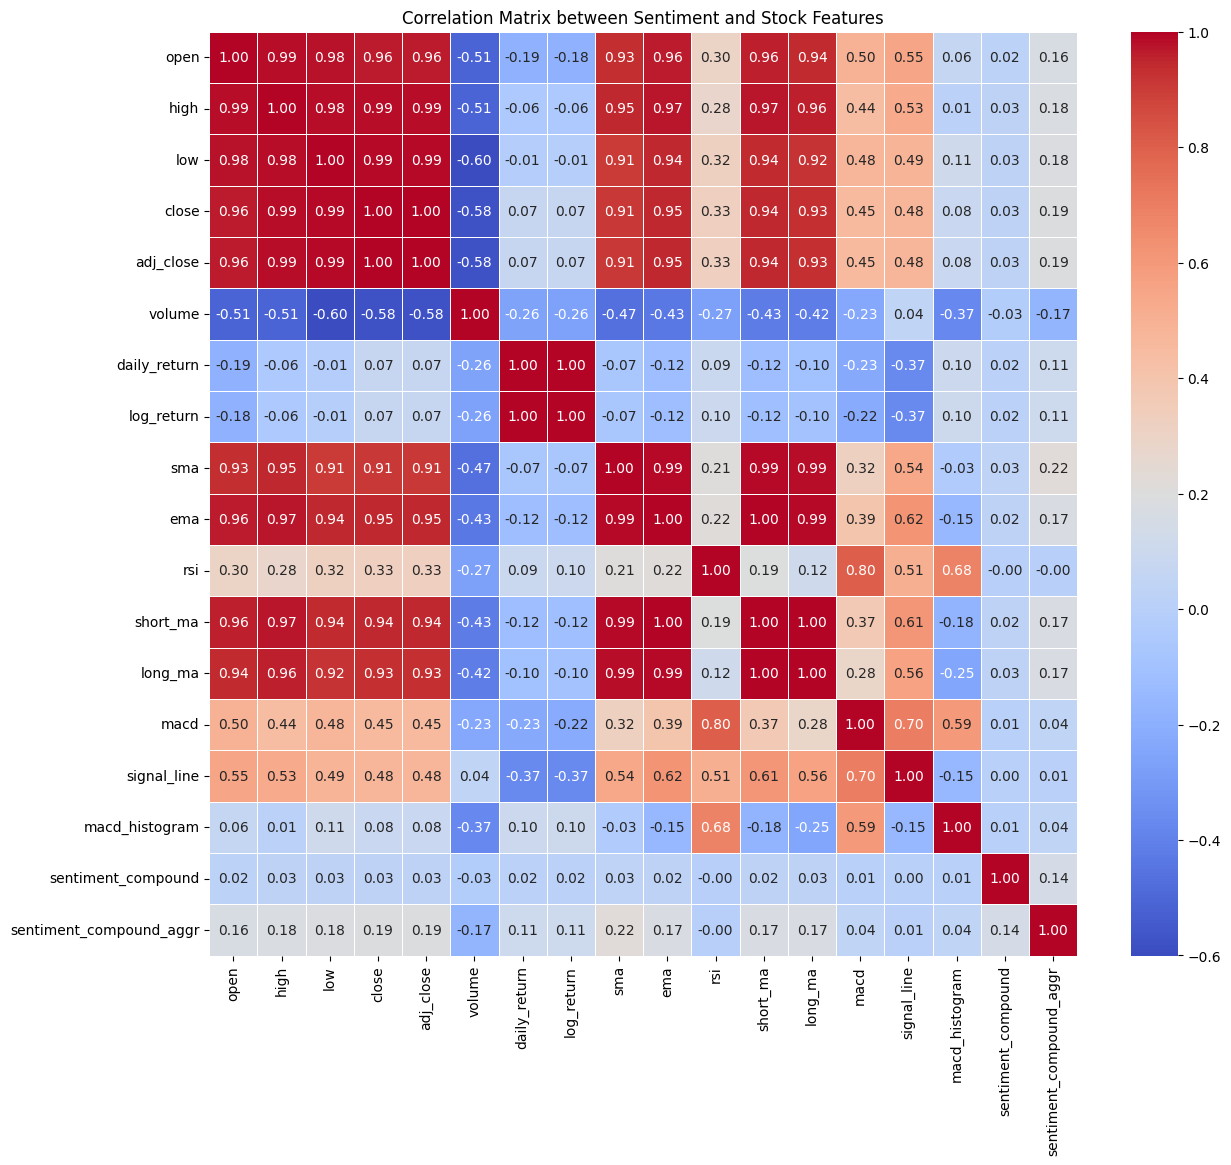

In [117]:
# Compute correlation matrix
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data[numeric_columns].corr()

# Perform further analysis or visualization as needed
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Sentiment and Stock Features')
plt.show()

# Extract the top correlations
top_correlations = correlation_matrix.unstack().sort_values(ascending=False)


A correlation matrix is a table that shows the correlation coefficients between all pairs of features in a dataset. The correlation coefficients between the `sentiment compound score` and the `stock features` are shown in the cells at the intersection of the sentiment compound score row and column with the other feature rows and columns. For example, the correlation coefficient between the `sentiment compound score` and the `open price` is 0.02. This means that there is a very weak positive correlation between the `sentiment compound score` and the `open price`. In other words, when the sentiment compound score is higher, the open price tends to be slightly higher, but the relationship is very weak. 


In [19]:
# Assuming 'merged_data' includes columns 'date' and 'sentiment_compound'
# Replace with your actual column names

# Find the day with the least sentiment score
least_sentiment_date = merged_data.loc[merged_data['sentiment_compound_aggr'].idxmin()]['date']
least_sentiment_score = merged_data['sentiment_compound_aggr'].min()

# Find the day with the highest sentiment score
highest_sentiment_date = merged_data.loc[merged_data['sentiment_compound_aggr'].idxmax()]['date']
highest_sentiment_score = merged_data['sentiment_compound_aggr'].max()

# Display the results
print(f"Least Sentiment Score")
print(f"\nDate: {least_sentiment_date}")
print(f"Least Sentiment Score: {least_sentiment_score}")

print(f"Highest Sentiment Score")
print(f"\nDate: {highest_sentiment_date}")
print(f"Highest Sentiment Score: {highest_sentiment_score}")

Least Sentiment Score

Date: 2021-04-30
Least Sentiment Score: -0.18894074074074074
Highest Sentiment Score

Date: 2021-04-20
Highest Sentiment Score: 0.19998620689655172


To contextualize and address the provided questions, it is essential to analyze statistical information derived from sentiment scores and their correlation with stock prices. The identified date with the least sentiment score on **April 30, 2021**, at -0.1889, and the date with the highest sentiment score on **April 20, 2021**, at 0.1999, offer crucial insights. By exploring the statistical distribution of sentiment scores across various stocks and sectors during these critical dates, we can discern patterns and trends. 

##  Presenting the data

### Sentiment and Daily Return Over Time

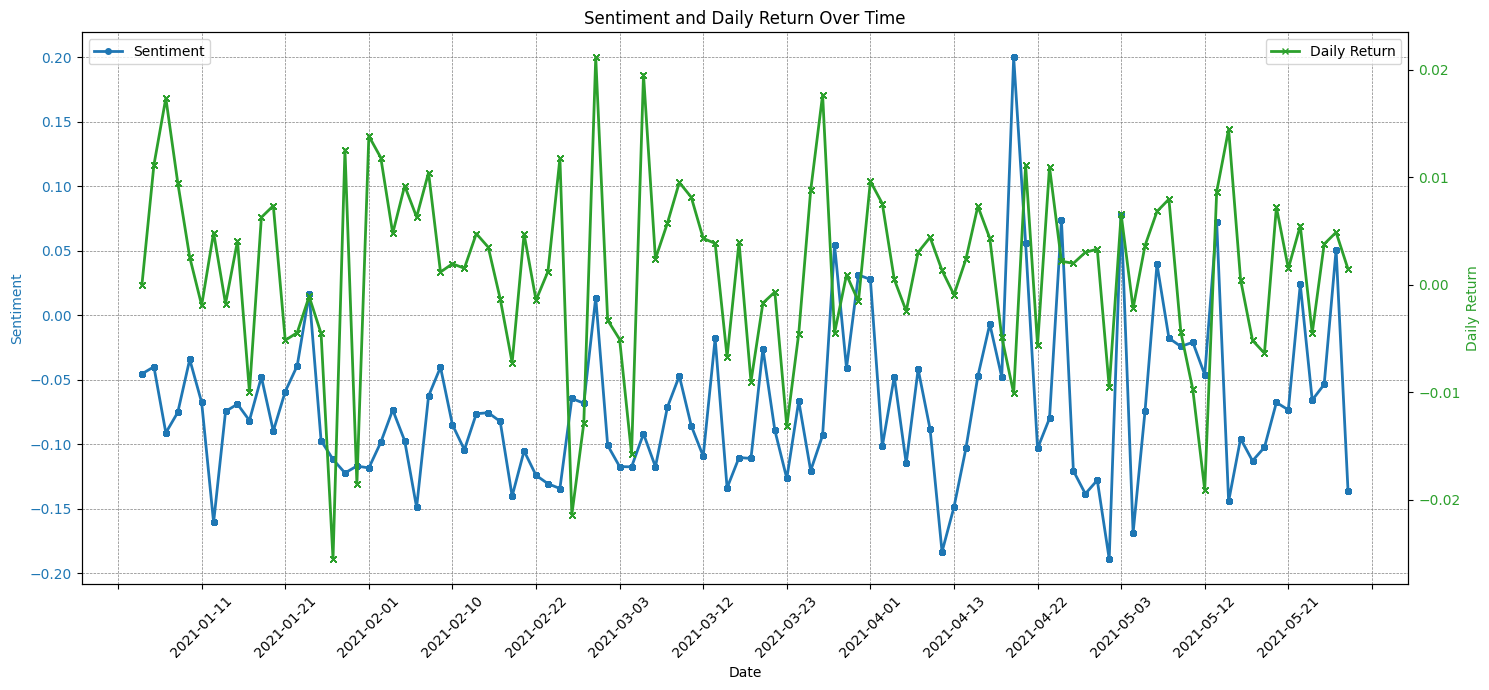

In [20]:
# Create a larger figure for better readability
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the sentiment data on the first y-axis
color = 'tab:blue'
ax1.plot(merged_data['date'], merged_data['sentiment_compound_aggr'], color=color, marker='o', linestyle='-', linewidth=2, markersize=4, label='Sentiment')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Show a date tick every week
plt.xticks(rotation=45)  # Rotate the date labels for better readability
ax1.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')  # Adjust grid appearance

# Plot daily return on the secondary y-axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.plot(merged_data['date'], merged_data['daily_return'], color=color, marker='x', linestyle='-', linewidth=2, markersize=4, label='Daily Return')
ax2.set_ylabel('Daily Return', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Sentiment and Daily Return Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


The graph shows that there is a weak positive correlation between the `sentiment compound score` and the `daily return`. This means that when the sentiment compound score is higher, the daily return tends to be slightly higher, but the relationship is very weak. The daily return (orange line) is volatile, with some days seeing large gains and other days seeing large losses due to the other factors affecting the results. Analyzing the aforementioned statistical data, it is clear that the date displayed at the highest sentiment score, April 20, 2021, had the greatest impact on the next day’s market dynamics This effect is reflected in the daily profit, which exhibited a significant change from a negative value of **-0.010** to a positive value of **0.011**. In contrast, a different pattern is evident on April 30, 2021, the date marked by the lowest sentiment score. The market clearly slowed down during this period, leading to a sharp decline in daily returns, which fell sharply to **-0.18**. These observed changes highlight the tangible impact that sentiment scores can have on short-term market dynamics.

### Rolling Correlation Between Sentiment and Daily Return (15-day window)

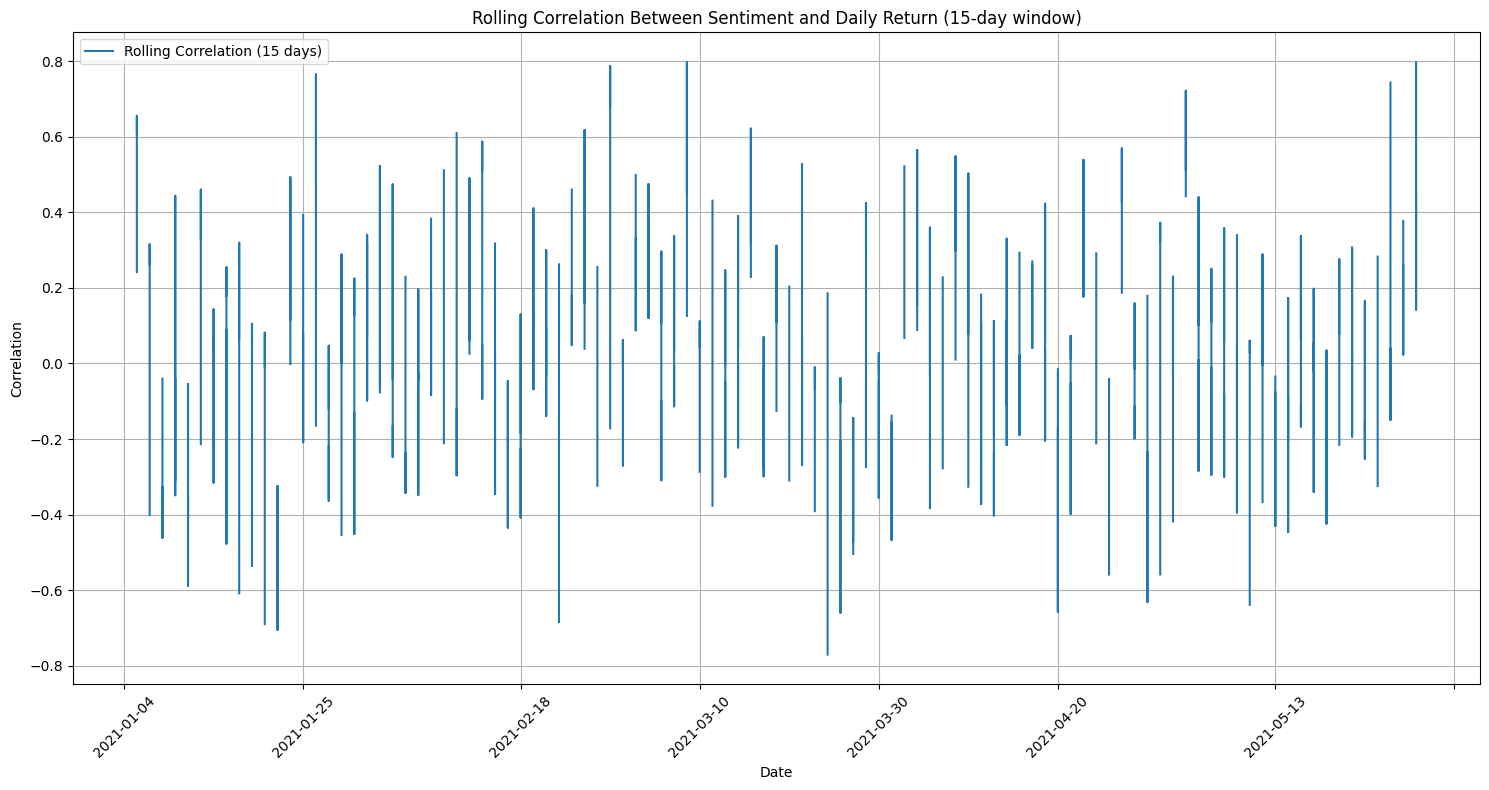

In [120]:
# Define the rolling window size
rolling_window_size = 15  # Adjust the window size as needed

# Calculate rolling correlations
merged_data['rolling_correlation'] = merged_data['sentiment_compound'].rolling(window=rolling_window_size).corr(merged_data['daily_return'])

# Now, we can plot using matplotlib
plt.figure(figsize=(15, 8))  # Increase figure size for better readability

# Plotting the rolling correlation
plt.plot(merged_data['date'], merged_data['rolling_correlation'], label=f'Rolling Correlation ({rolling_window_size} days)')

# Adding title and labels
plt.title(f'Rolling Correlation Between Sentiment and Daily Return ({rolling_window_size}-day window)')

plt.xlabel('Date')
plt.ylabel('Correlation')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically find the best locator based on the time span
plt.xticks(rotation=45)  # Rotate the date labels to prevent overlap
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The graph is a visual representation of the rolling correlation coefficient between two time-series datasets: sentiment scores and daily returns. The X-axis displays the dates for the period covered, while the Y-axis represents the correlation coefficient values ranging from -1 to 1. Each point on the line indicates the correlation coefficient calculated over a rolling window of 15 days. Correlation coefficients measure the strength and direction of a linear relationship between two variables. A coefficient close to 1 suggests a strong positive correlation, meaning that as sentiment scores increase, daily returns also tend to increase. Conversely, a coefficient close to -1 suggests a strong negative correlation, where an increase in sentiment scores would typically coincide with a decrease in daily returns. A coefficient around 0 indicates no linear correlation. 

### Impact of Extreme Sentiment on Daily Return

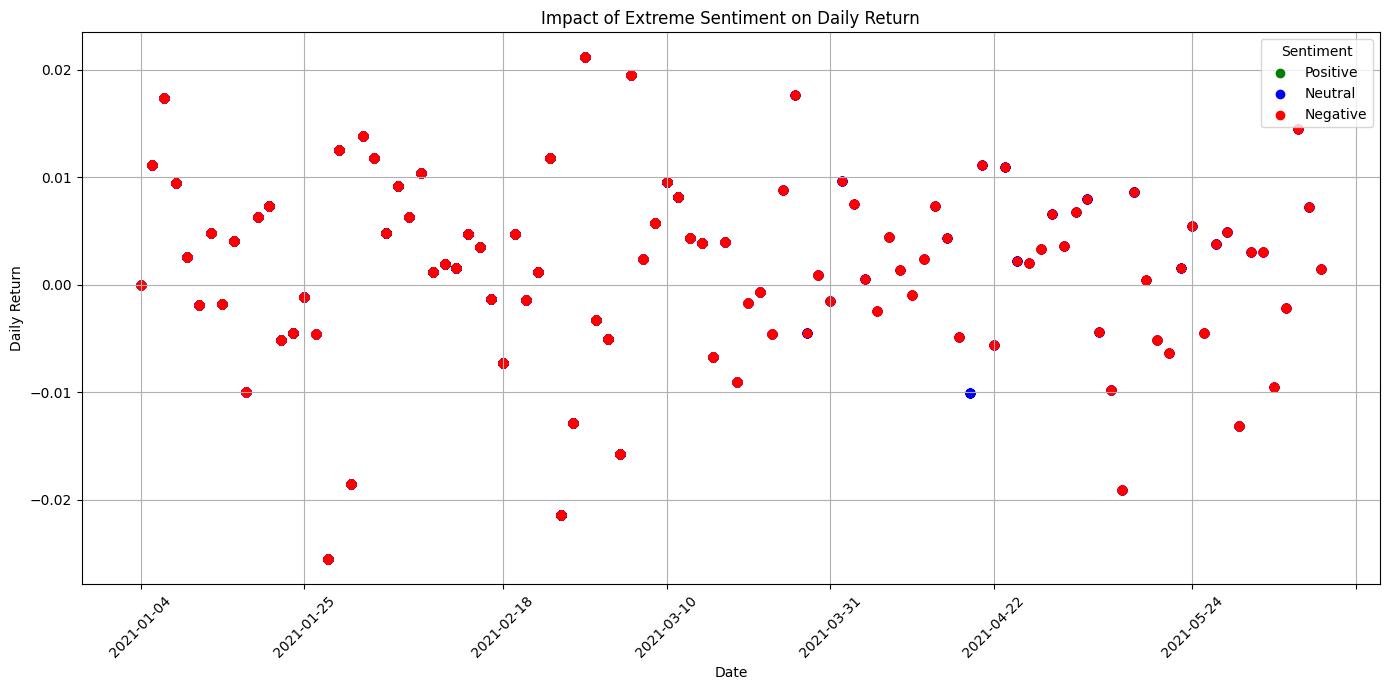

In [121]:
# Define thresholds for extreme sentiment
positive_sentiment_threshold = 0.5
negative_sentiment_threshold = -0.5

# Create a new column indicating extreme sentiment
merged_data['extreme_sentiment'] = 'Neutral'
merged_data.loc[merged_data['sentiment_compound'] > positive_sentiment_threshold, 'extreme_sentiment'] = 'Positive'
merged_data.loc[merged_data['sentiment_compound'] < negative_sentiment_threshold, 'extreme_sentiment'] = 'Negative'

# Create a scatter plot with color-coded points based on extreme sentiment
# Colors for the scatter plot
colors = {'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}

plt.figure(figsize=(14, 7))

# Plot each sentiment category in different colors
for sentiment, color in colors.items():
    subset = merged_data[merged_data['extreme_sentiment'] == sentiment]
    plt.scatter(subset['date'], subset['daily_return'], c=color, label=sentiment)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Impact of Extreme Sentiment on Daily Return')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The graph aims to show how strongly extreme sentiments are associated with the daily returns of a stock. The X-axis represents dates over a few months in 2021, and the Y-axis represents the daily return, presumably expressed as a percentage. Each dot on the graph represents a day's sentiment and corresponding daily return. The dots are color-coded to represent different sentiments: red for negative, blue for positive, and presumably another color (not visible in the description) for neutral. It seems that most of the data points represent days with negative sentiment, with only a few days having positive sentiment, indicated by blue dots.

### Closing Prices and Aggregated Sentiment Scores Over Time

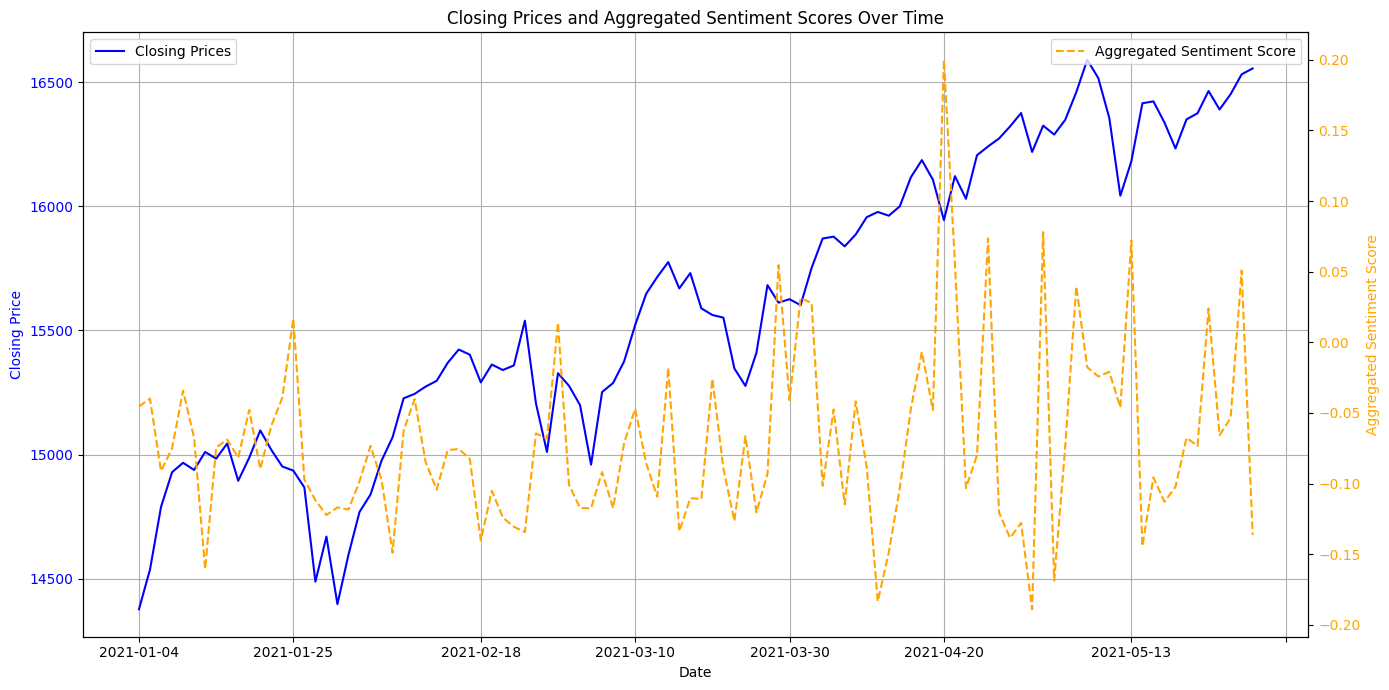

In [122]:
# Create a new figure and axis object with shared x-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the closing prices on the primary y-axis
ax1.plot(merged_data['date'], merged_data['close'], label='Closing Prices', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the normalized sentiment scores
ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['sentiment_compound_aggr'], label='Aggregated Sentiment Score', color='orange', linestyle='--')
ax2.set_ylabel('Aggregated Sentiment Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title, grid and legend
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.title('Closing Prices and Aggregated Sentiment Scores Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
ax1.grid(True)
plt.tight_layout()
plt.show()


This chart plots two distinct data series against time. The primary Y-axis (on the left) likely corresponds to the closing prices of a stock, indicated by the blue line. The secondary Y-axis (on the right) appears to represent the aggregated sentiment scores, shown by the orange dashed line. The X-axis represents time, with dates extending from early January to mid-May 2021. From the beginning to the end of the observed period, there is an overall upward trend, indicating an increase in value over time. However, this progression is not linear; there are noticeable fluctuations that suggest periods of volatility where the prices have risen and fallen within shorter time frames. The orange dashed line represents aggregated sentiment scores, which measure the collective sentiment (such as from news articles, social media, etc.) towards the financial market.  The dual-axis format allows for the comparison of two different scales of measurement side by side. It seems that there are moments when an increase in sentiment precedes an increase in closing prices and vice versa. 

### Closing Prices and Moving Averages Over Time

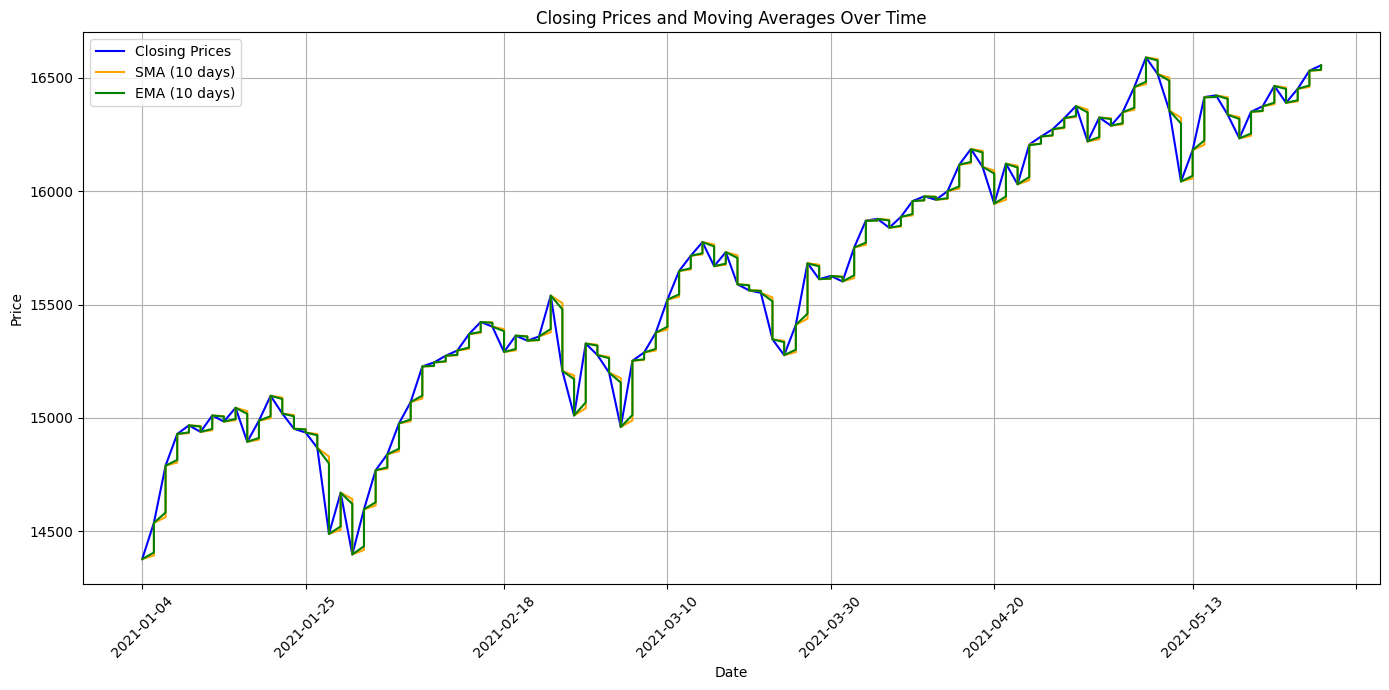

In [124]:
# Calculate the SMA and EMA for the 'close' column
# The window for SMA and span for EMA can be changed according to your needs
window_for_sma = 10
span_for_ema = 10

merged_data['sma'] = merged_data['close'].rolling(window=window_for_sma).mean()
merged_data['ema'] = merged_data['close'].ewm(span=span_for_ema, adjust=False).mean()

# Plotting the closing prices, SMA, and EMA using matplotlib
plt.figure(figsize=(14, 7))

# Closing Prices
plt.plot(merged_data['date'], merged_data['close'], label='Closing Prices', color='blue')

# SMA (Simple Moving Average)
plt.plot(merged_data['date'], merged_data['sma'], label=f'SMA ({window_for_sma} days)', color='orange')

# EMA (Exponential Moving Average)
plt.plot(merged_data['date'], merged_data['ema'], label=f'EMA ({span_for_ema} days)', color='green')

# Adding title and labels
plt.title('Closing Prices and Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The graph plots the daily closing prices of a stock alongside its 10-day Simple Moving Average (SMA) and Exponential Moving Average (EMA). The time frame spans from January to May 2021. The blue line represents the actual closing prices each day, the orange line depicts the SMA, and the green line shows the EMA, with the latter two serving as indicators to smooth out price volatility and highlight underlying trends.

The moving averages, both SMA and EMA, are calculated over a 10-day window and serve distinct purposes. The SMA (orange line) offers a straightforward average that smooths out short-term price fluctuations, providing a clearer view of the price trend over the intermediate term. The EMA (green line), on the other hand, reacts more sensitively to recent price changes, giving investors a hint at emerging trends. The interaction between these lines and the closing price can signal potential shifts in market dynamics, with crossovers often watched by traders for buying or selling opportunities.

Throughout the observed period, the graph exhibits several crossovers between the closing prices and the moving averages, each potentially signaling a shift in trend. For instance, when the closing price dips below both moving averages, it might suggest a bearish outlook, whereas crossing above could indicate bullish behavior. The overall trajectory of the asset's closing price is upward, suggesting a general increase in value despite the interim periods of decline.

### Stock Percentage Change and Sentiment Over Time

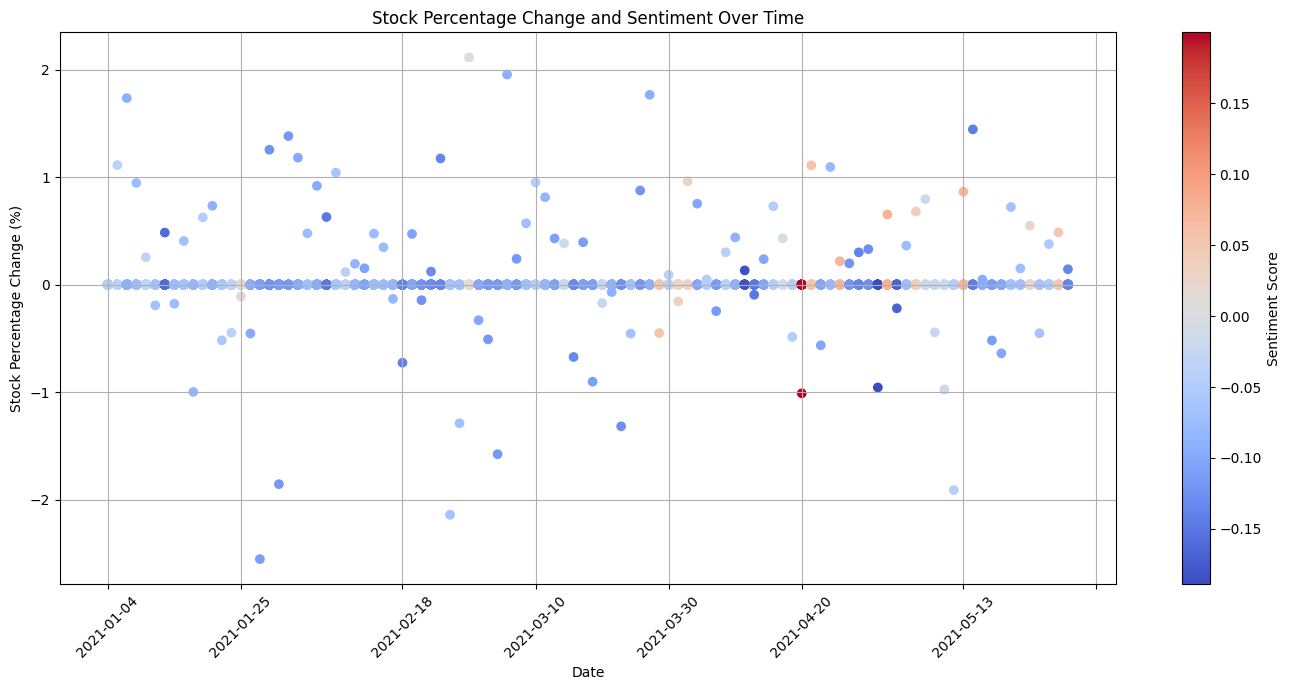

In [127]:
# Calculate the percentage change in stock prices
merged_data['stock_percentage_change'] = merged_data['close'].pct_change() * 100

# Create a scatter plot using matplotlib
plt.figure(figsize=(14, 7))

# Color map to represent sentiment scores
scatter = plt.scatter(merged_data['date'], merged_data['stock_percentage_change'],
                      c=merged_data['sentiment_compound_aggr'], cmap='coolwarm')

# Adding color bar to show the sentiment score associated with the colors
cbar = plt.colorbar(scatter)
cbar.set_label('Sentiment Score')

# Adding title and labels
plt.title('Stock Percentage Change and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Percentage Change (%)')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.grid(True)
plt.tight_layout()
plt.show()


The graph shows the relationship between the stock percentage change, which is likely the day-over-day percentage change in stock price, and sentiment score, which measures the general mood or opinion about the stock as derived from various sources, such as news articles or social media. The X-axis represents time, with dates spanning several months in 2021, while the Y-axis indicates the stock percentage change. Each dot's color represents the sentiment score on that day, with the color gradient ranging from blue (negative sentiment) to red (positive sentiment).

The vertical spread of the dots along the Y-axis suggests volatility in the stock's daily performance, with some days experiencing significant increases in value (above zero) and others experiencing decreases (below zero). The majority of data points hover around the zero line, suggesting that on most days, the stock's percentage change was relatively small. However, there are outliers on both the positive and negative sides, indicating days with unusually large gains or losses.

The color gradient allows for a visual assessment of whether there's a correlation between the sentiment score and the stock's performance. While there is no immediate, obvious pattern indicating a strong correlation, it does seem that there are clusters of days with neutral sentiment (dots with colors closer to the middle of the color spectrum) where the stock's percentage change is also close to zero. This could imply that on days with extreme sentiment, there may be larger movements in the stock's price.

### OLS Regression Results

In [126]:
import statsmodels.api as sm

# Regression Analysis
X = sm.add_constant(merged_data['sentiment_compound_aggr'])
y = merged_data['daily_return']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           daily_return   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     95.61
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.85e-22
Time:                        08:54:39   Log-Likelihood:                 27508.
No. Observations:                8391   AIC:                        -5.501e+04
Df Residuals:                    8389   BIC:                        -5.500e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**Overview of Regression Output Paragraph**:
The provided OLS regression output summarizes the results of a statistical analysis exploring the relationship between daily stock returns and aggregated sentiment scores. The dependent variable in the model is `daily_return`, which signifies the percentage change in stock price. The `R-squared` value of **0.011** indicates a low degree of explanatory power, with the model accounting for just **1.1%** of the variation in daily returns. The 'Adjusted R-squared' mirrors this value, confirming the limited fit of the model to the data.

**Model Fit and Significance Paragraph**:
Despite the low explanatory power, the `F-statistic` of **95.61** and the exceedingly small `Prob (F-statistic)` (near zero) suggest the model as a whole is statistically significant. This implies that the relationship between sentiment scores and stock returns is not due to random chance. The constant term, represented by `const`, has a coefficient of **0.0028**, indicating the expected value of daily returns when the sentiment score is zero.

**Coefficient Analysis Paragraph**:
The coefficient for `sentiment_compound_aggr` is **0.0195**, which means that for each one-unit increase in the sentiment score, the daily return is expected to increase by an avera*ge of *1.95%**. The statistical significance of this coefficient is backed by a very low p-value, implying that the relationship between sentiment and daily returns is strong enough to be unlikely caused by random fluctuations in the data.

**Residuals and Model Assumptions Paragraph**:
The diagnostics for the model reveal some concerns. The 'Omnibus' and 'Jarque-Bera (JB)' tests result in low p-values, indicating that the residuals of the model do not follow a normal distribution. This is also suggested by the 'Skew' value, which points to an asymmetry in the distribution of residuals, and the 'Kurtosis' value, which indicates that the tails of the distribution are not as heavy as expected for a normal distribution. The 'Durbin-Watson' statistic is very close to zero, which may indicate the presence of positive serial correlation in the residuals, potentially undermining the independence assumption of the regression model.


## Conclusion

This study analyzes the impact of news sentiment on stock prices using data from January to December 2021. Key steps include extracting stock indices from a SQLite database, allowing users to select a stock, and then examining its prices and related news data. Financial metrics like daily/log returns, moving averages, RSI, MACD, and sentiment scores are calculated for deeper insights.

The analysis centers on the correlation between news sentiments and stock prices. Compound sentiment scores are correlated with stock features like open prices and daily returns. Key findings show that high sentiment scores positively influence market dynamics, as seen on April 20, 2021, while low scores, like on April 30, correlate with market downturns.

An Ordinary Least Squares (OLS) regression analysis further quantifies the relationship between sentiment scores and daily stock returns. While the model's explanatory power is low (R-squared of 0.011), significant F-statistics suggest a non-random relationship. Each unit increase in sentiment score is associated with a 1.95% increase in daily return, although the model's residuals indicate potential issues with normal distribution and serial correlation.